In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import imutils
import matplotlib.patches as patches
import pytesseract
import cv2

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from helpers.utils import plot_history, load_kaggle_A_Z, load_custom_dataset, plot_correct_incorrect
from custom_dataset_preprocess import scale_dataset, rgb2gray, shrink

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

from helpers.sliding_window_utils import pyramid, sliding_window, detect_text, handwriting_detection

# Load Kaggle A-Z dataset

In [2]:
X, y = load_kaggle_A_Z("./kaggle_A-Z_dataset/A_Z Handwritten Data.csv")
sample_idx = 100000
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("Label sample:", alphabet[y[sample_idx]])

Label sample: L


In [3]:
X = scale_dataset(X)
X = X.reshape(-1, 28, 28, 1)
print(X.shape)
print(X.dtype)

(372450, 28, 28, 1)
float64


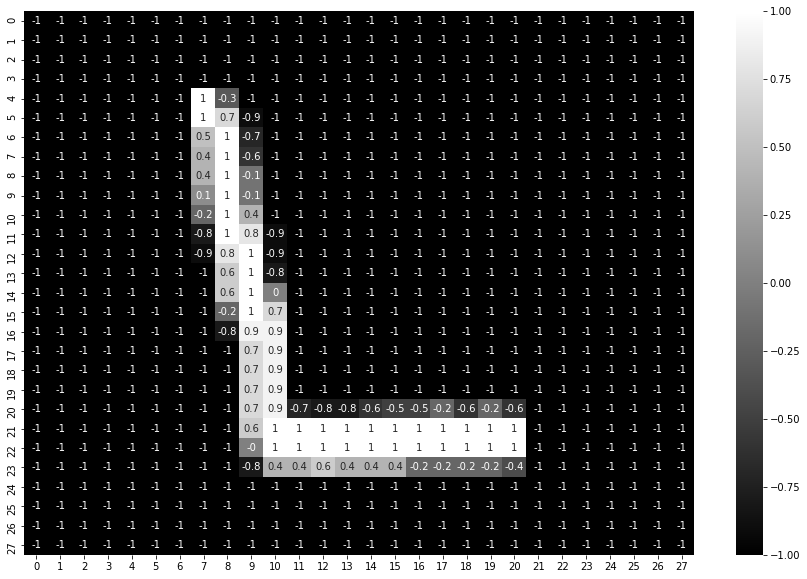

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.round(X[sample_idx], 1).reshape(28, 28), cmap="gray", annot=True, fmt="g")
plt.show()

# Load custom dataset

In [5]:
X_transfer, y_transfer = load_custom_dataset("./preprocessed_dataset")

In [6]:
X_transfer = scale_dataset(X_transfer)
X_transfer = X_transfer.reshape(-1, 28, 28, 1)
print(X_transfer.shape)
print(X_transfer.dtype)

(260, 28, 28, 1)
float64


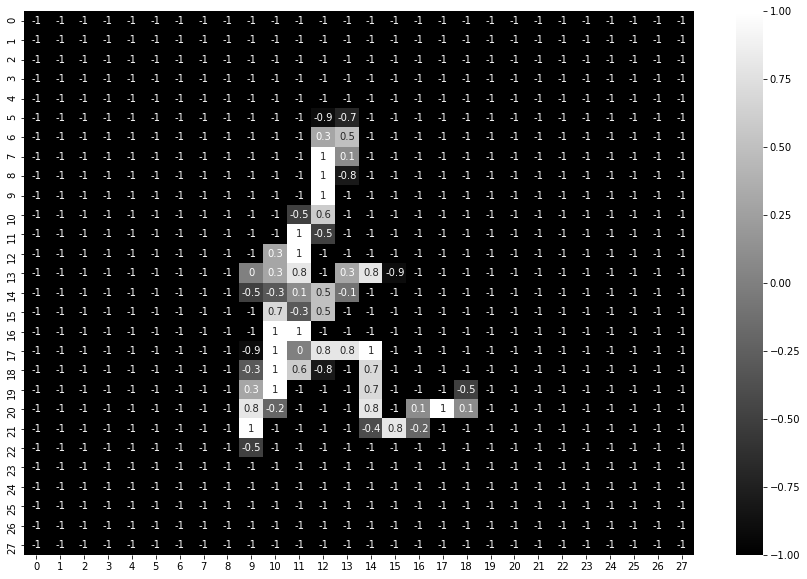

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.round(X_transfer[100], 1).reshape(28, 28), cmap="gray", annot=True, fmt="g")
plt.show()

# Split dataset

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train_transfer, X_valid_transfer, y_train_transfer, y_valid_transfer = train_test_split(X_transfer, y_transfer, test_size=0.4, random_state=0, stratify=y_transfer)

# Model Comparison

In [9]:
model = tf.keras.models.load_model("./models/trained_CNN.h5")
model_transfer = tf.keras.models.load_model("./models/transfer_model.h5")
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

In [10]:
model.evaluate(X_valid_transfer, y_valid_transfer)

4/4 [==============================] - 3s 18ms/step - loss: 4.3049 - accuracy: 0.3462


[4.304940700531006, 0.3461538553237915]

In [12]:
model_transfer.evaluate(X_valid_transfer, y_valid_transfer)

4/4 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.9519


[0.18766570091247559, 0.9519230723381042]